In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import preprocess as pre
import matplotlib.pyplot as plt
import seaborn as sb

Doing step (a)

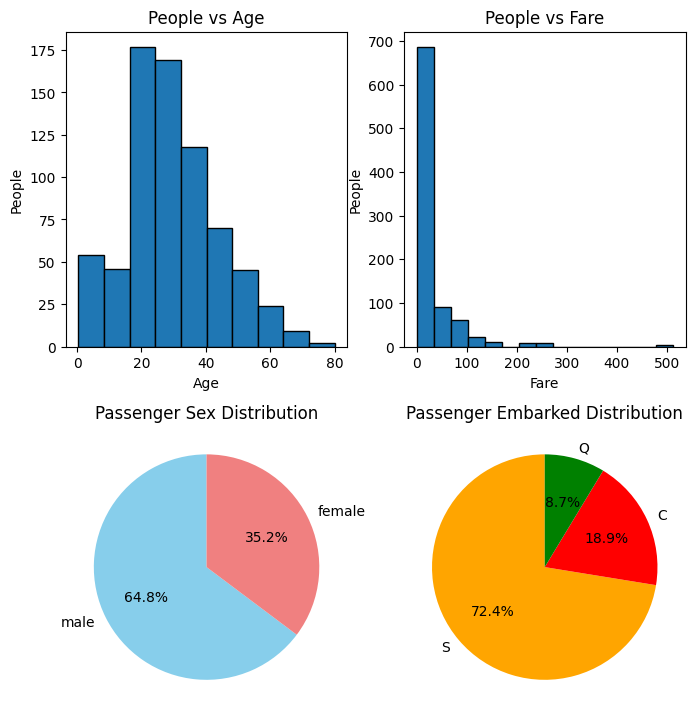

In [2]:
data_df=pre.load_data()
 ##loads correctly  ##histogram of age,fare
plt.figure(figsize=(8,9))
plt.subplot(2,2,1)
plt.hist(data_df['Age'], bins=10, edgecolor='black')
plt.title("People vs Age")
plt.xlabel("Age")
plt.ylabel("People")
plt.subplot(2,2,2)
plt.hist(data_df['Fare'], bins=15, edgecolor='black')
plt.title("People vs Fare")
plt.xlabel("Fare")
plt.ylabel("People")
plt.subplot(2,2,3)
counts = data_df['Sex'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Passenger Sex Distribution')
plt.subplot(2,2,4)
counts = data_df['Embarked'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'red','green'])
plt.title('Passenger Embarked Distribution')
plt.show()

Doing step (b)

c:\Users\Arunabh\Desktop\titanic_preprocessing\notebook\..\preprocess.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Age'].fillna(overall_median,inplace=True)
c:\Users\Arunabh\Desktop\titanic_preprocessing\notebook\..\preprocess.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

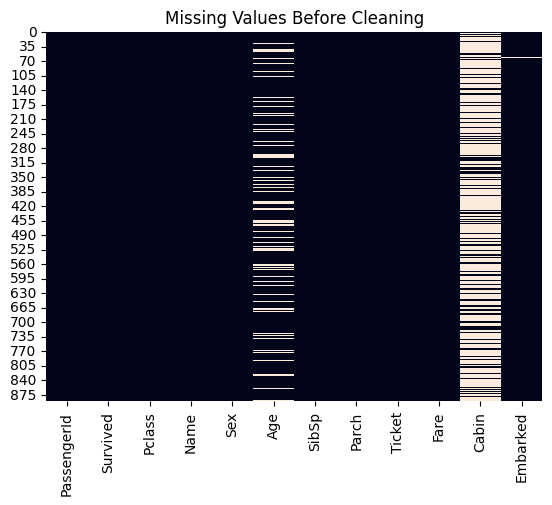

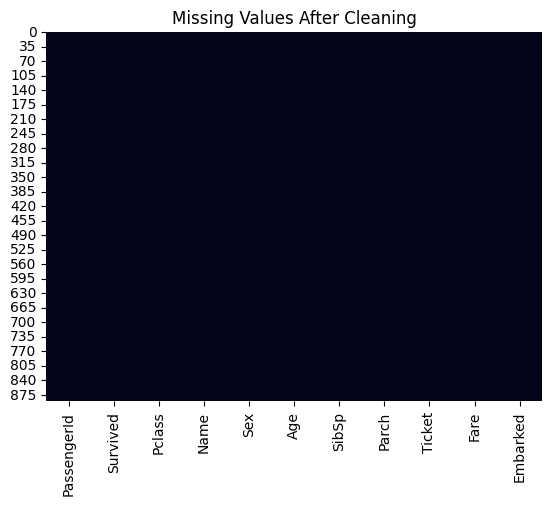

In [3]:
sb.heatmap(data_df.isnull(), cbar=False)
plt.title("Missing Values Before Cleaning")
data_df=pre.clean_data(data_df)
plt.show()
# After cleaning
sb.heatmap(data_df.isnull(), cbar=False)
plt.title("Missing Values After Cleaning")
plt.show()


In [4]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Doing step (c)

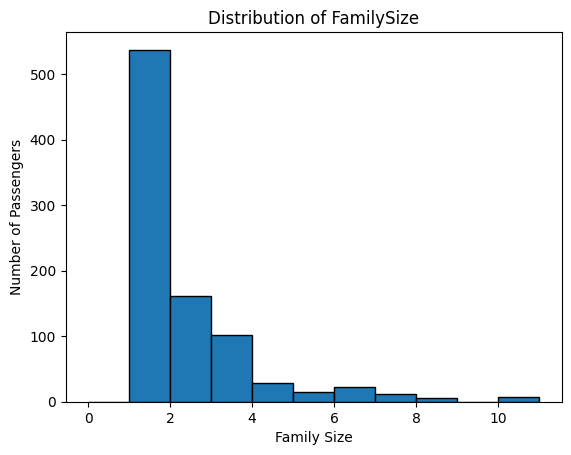

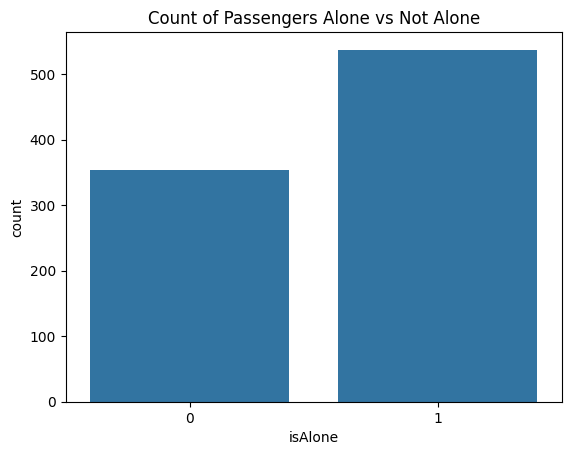

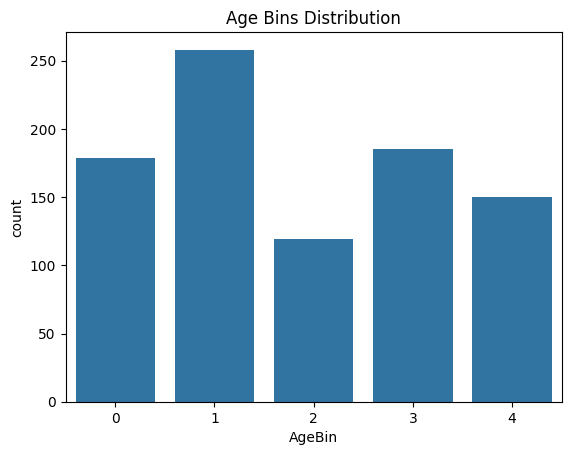

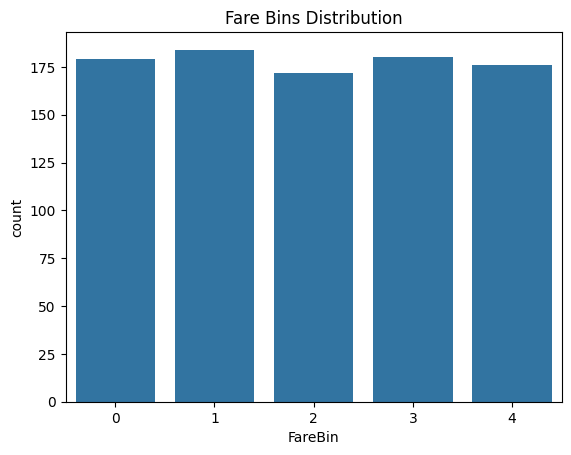

In [5]:
data_df=pre.engineer_features(data_df)
plt.hist(data_df['FamilySize'], bins=range(0,12), edgecolor='black')
plt.title('Distribution of FamilySize')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.show()
sb.countplot(x='isAlone', data=data_df)
plt.title('Count of Passengers Alone vs Not Alone')
plt.show()
sb.countplot(x='AgeBin', data=data_df)
plt.title('Age Bins Distribution')
plt.show()
sb.countplot(x='FareBin', data=data_df)
plt.title('Fare Bins Distribution')
plt.show()


In [6]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,isAlone,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mr,2,0,3,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mr,2,0,3,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,rare,1,1,2,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,1,1,0,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,Miss,4,0,1,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,1,1,2,3


Doing step (d)

C:\Users\Arunabh\AppData\Local\Temp\ipykernel_12836\3197887614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Sex_female', data=data_df,palette=['red','blue'])


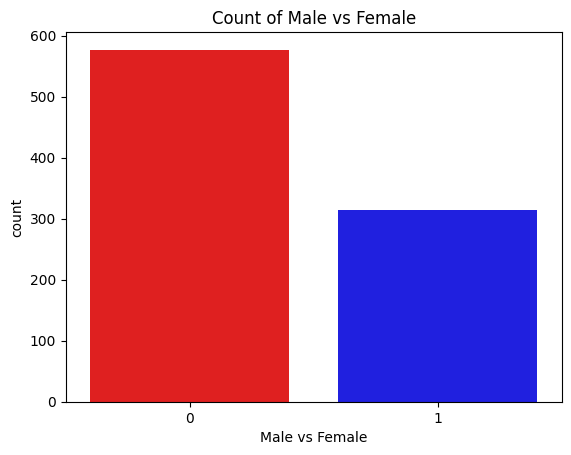

C:\Users\Arunabh\AppData\Local\Temp\ipykernel_12836\3197887614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Title_rare', data=data_df,palette=['green','blue'])


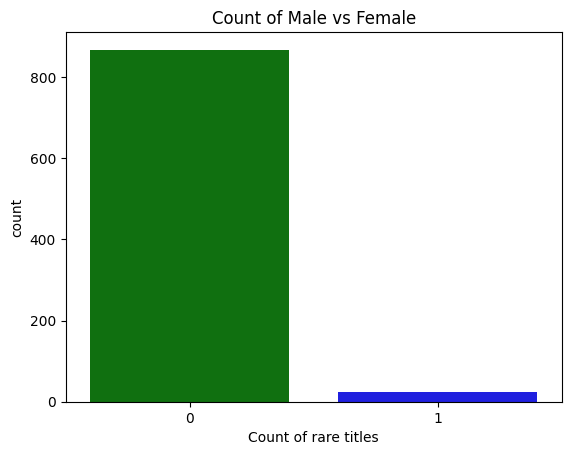

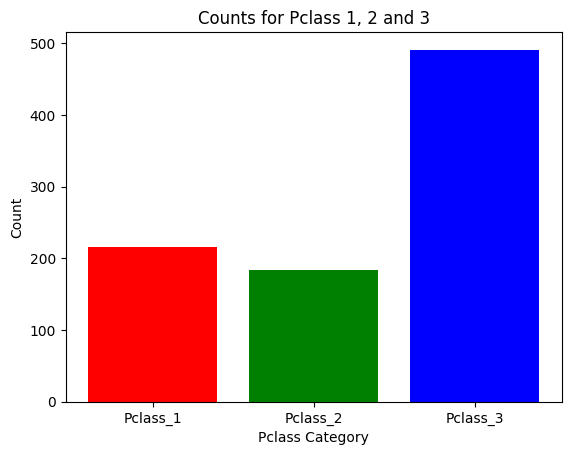

In [7]:
data_df=pre.encode_and_scale(data_df)
sb.countplot(x='Sex_female', data=data_df,palette=['red','blue'])
plt.title('Count of Male vs Female')
plt.xlabel("Male vs Female")
plt.show()
sb.countplot(x='Title_rare', data=data_df,palette=['green','blue'])
plt.title('Count of Male vs Female')
plt.xlabel('Count of rare titles')
plt.show()
pclass_categories = ['Pclass_1', 'Pclass_2', 'Pclass_3']
pclass_counts = [data_df[col].sum() for col in pclass_categories]
plt.bar(pclass_categories, pclass_counts, color=['red', 'green', 'blue'])
plt.title('Counts for Pclass 1, 2 and 3')
plt.xlabel('Pclass Category')
plt.ylabel('Count')
plt.show()


In [8]:
data_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,...,Embarked_S,Embarked_C,Embarked_Q,Pclass_3,Pclass_1,Pclass_2,Title_Mr,Title_Miss,Title_Master,Title_rare
0,0,3,male,0.334159,1,0,0.029116,S,Mr,2,...,1,0,0,1,0,0,1,0,0,0
1,1,1,female,0.581914,1,0,0.286271,C,Mr,2,...,0,1,0,0,1,0,1,0,0,0
2,1,3,female,0.396098,0,0,0.031827,S,Miss,1,...,1,0,0,1,0,0,0,1,0,0
3,1,1,female,0.535460,1,0,0.213248,S,Mr,2,...,1,0,0,0,1,0,1,0,0,0
4,0,3,male,0.535460,0,0,0.032329,S,Mr,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.411583,0,0,0.052208,S,rare,1,...,1,0,0,0,0,1,0,0,0,1
887,1,1,female,0.287705,0,0,0.120479,S,Miss,1,...,1,0,0,0,1,0,0,1,0,0
888,0,3,female,0.326417,1,2,0.094174,S,Miss,4,...,1,0,0,1,0,0,0,1,0,0
889,1,1,male,0.396098,0,0,0.120479,C,Mr,1,...,0,1,0,0,1,0,1,0,0,0


Doing part e

In [9]:
pre.save_outputs(data_df)